# 2. Numpy with images

All images are essentially matrices with a variable number of dimensions where each element represents the value of one pixel. The different dimensions and the pixel values can have very different meanings depending on the type of image considered, but the structure is the same.

Python does not allow by default to gracefully handle multi-dimensional data. In particular it is not desgined to handle matrix operations. Numpy was developed to fill in this blank and offers a very similar framework as the one offered by Matlab. It is underlying a large number of packages and has become abolsutely essential to Python scientific programming. In particular it underlies the functions of scikit-image. The latter in turn forms the basis of other software like CellProfiler. It is thus essential to have a good understanding of Numpy to  proceed.

Instead of introducing Numpy in an abstract way, we are going here to present it through the lense of image processing in order to focus on the most useful features in the context of this course.

## 2.1 Exploring an image

Some test images are provided directly in skimage, so let us look at one (we'll deal with the details of image import later). First let us import the necessary packages.

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

In [2]:
image = skimage.data.coins()

The first thing we can do is check the type of the image:

In [3]:
type(image)

numpy.ndarray

We thus see that the imported image is indeed a Numpy array. We can also find out what is the type of each pixel:

In [4]:
image.dtype

dtype('uint8')

We see here that the image is an 8bit image. Classical format we are going to see are 8bit (uint8), 16bit (uint16) and non-integers (usually float64). The type of the image pixels set what values they can take. For example 8bit means values from $0$ to $2^8 -1= 256-1 = 255$.

Since typing is dynamic in Python, if we for example divide our uint8 image by 2 it ends up being a float.

In [5]:
image2 = image/2

In [6]:
image2.dtype

dtype('float64')

Let us check what are the image dimensions using the shape method:

In [7]:
image.shape

(303, 384)

We see that the image has 303 rows and 384 columns. Let us have a look at it:

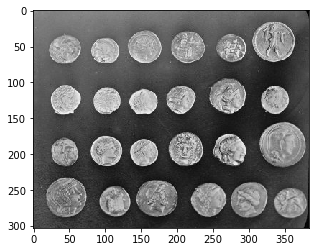

In [8]:
plt.imshow(image, cmap = 'gray')
plt.show()

Let us also look at the actual matrix behind that image:

In [9]:
image

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

Jupyter only shows us a part of this large matrix, adding ... between the first and last few rows/columns. Each value here corresponds to a single pixel of the image. The type of data contained in the array, here 8bit integer, is also displayed.

## 2.2 Operations on arrays

### 2.2.2 Arithmetic operations

Two types of simple arithmetic operations can be done on arrays. One can modify them using a scalar, for example by adding a constant:

In [10]:
print(image+10)

[[ 57 133 143 ...  24  13  22]
 [103 154 155 ...  22  17  17]
 [136 157 153 ...  12  23  13]
 ...
 [ 91  89  84 ...  16  14  17]
 [ 98  92  84 ...  15  17  18]
 [101  89  78 ...  14  20  17]]


One has to be very careful with the type of the image. For example let's add a large number:

In [11]:
print(image+230)

[[ 21  97 107 ... 244 233 242]
 [ 67 118 119 ... 242 237 237]
 [100 121 117 ... 232 243 233]
 ...
 [ 55  53  48 ... 236 234 237]
 [ 62  56  48 ... 235 237 238]
 [ 65  53  42 ... 234 240 237]]


Clearly something went wrong as we get values that are smaller than 230. As the array has 8bit type, with vlaues ranging from 0 to 255, any value above 255 limit gets reassigned at the start of the range.

It is important to note that when doing an operation, Python adopts the most complex type of the variables involved. Hence if we add a float instead of an integer:

In [12]:
print(image+230.0)

[[277. 353. 363. ... 244. 233. 242.]
 [323. 374. 375. ... 242. 237. 237.]
 [356. 377. 373. ... 232. 243. 233.]
 ...
 [311. 309. 304. ... 236. 234. 237.]
 [318. 312. 304. ... 235. 237. 238.]
 [321. 309. 298. ... 234. 240. 237.]]


the result is now correct and is of type float. If needed, arrays can be converted to approriate formats using the astype() method:

In [13]:
print(image.astype(float)+230)

[[277. 353. 363. ... 244. 233. 242.]
 [323. 374. 375. ... 242. 237. 237.]
 [356. 377. 373. ... 232. 243. 233.]
 ...
 [311. 309. 304. ... 236. 234. 237.]
 [318. 312. 304. ... 235. 237. 238.]
 [321. 309. 298. ... 234. 240. 237.]]


The second type of operation is element-wise by using two arrays of the same dimension. Let's change the image type to avoid the type of issue mentionded above.

In [14]:
image = image.astype(float)

Now we can for example multiply the image by itself:

In [15]:
print(image*image)

[[2.2090e+03 1.5129e+04 1.7689e+04 ... 1.9600e+02 9.0000e+00 1.4400e+02]
 [8.6490e+03 2.0736e+04 2.1025e+04 ... 1.4400e+02 4.9000e+01 4.9000e+01]
 [1.5876e+04 2.1609e+04 2.0449e+04 ... 4.0000e+00 1.6900e+02 9.0000e+00]
 ...
 [6.5610e+03 6.2410e+03 5.4760e+03 ... 3.6000e+01 1.6000e+01 4.9000e+01]
 [7.7440e+03 6.7240e+03 5.4760e+03 ... 2.5000e+01 4.9000e+01 6.4000e+01]
 [8.2810e+03 6.2410e+03 4.6240e+03 ... 1.6000e+01 1.0000e+02 4.9000e+01]]


### 2.2.3 Logical operations

A set of important operations when processing images are logical (or boolean) operations. Those have a very simple syntax in Numpy. For example, let's compare pixel intensities to some value *a*:

In [16]:
a = 100
print(image)
print(image>a)

[[ 47. 123. 133. ...  14.   3.  12.]
 [ 93. 144. 145. ...  12.   7.   7.]
 [126. 147. 143. ...   2.  13.   3.]
 ...
 [ 81.  79.  74. ...   6.   4.   7.]
 [ 88.  82.  74. ...   5.   7.   8.]
 [ 91.  79.  68. ...   4.  10.   7.]]
[[False  True  True ... False False False]
 [False  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


We see that the returned object is a logical matrix (containg True and False) of the same size as the image. That returned object can be directly assigned to a variable, leading to a very compact formulation:

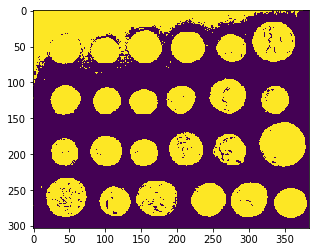

In [17]:
image_threshold = image > a

plt.imshow(image_threshold)

Of course other logical operator can be used (<, >, ==, !=) and the resulting boolean matrices combined:

In [18]:
a = 70
b = 100
image_threshold = (image>a)*(image<b)

print (image_threshold)

[[False False False ... False False False]
 [ True False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True False ... False False False]]


## 2.2.4 Functional operations

Numpy has a large trove of functions to act on arrays. Just like the arithmetic operations described above, those functions are designed to be applied to entire arrays, and can either generate a new array or a single value. For example the mean, maximum and minmal pixel values can be abtained like this:

In [19]:
np.mean(image)

96.85551602035204

In [20]:
np.max(image)

252.0

In [21]:
np.min(image)

1.0

Alternatively one can take the square root of each array element by doing:

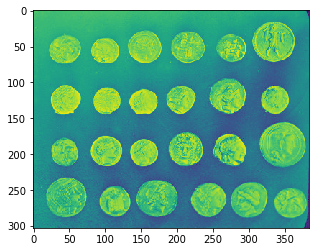

In [22]:
plt.imshow(np.sqrt(image))

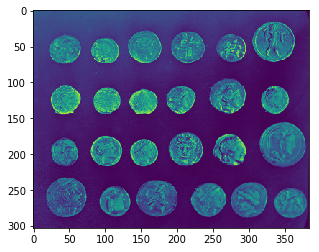

In [23]:
plt.imshow(image ** 2)

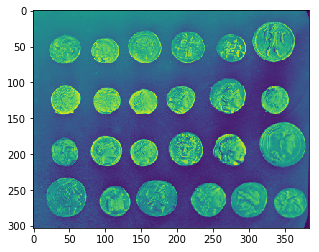

In [24]:
plt.imshow(image)

It is impossible to give an exhaustive presentation of Numpy functions. We will simply describe functions that we use a we go through course material.

## 2.3 Slicing and indexing

Let us now use another image to explore how to select specific parts of an image.

In [25]:
image = skimage.data.chelsea()

In [26]:
image.shape

(300, 451, 3)

We see that the image has three dimensions, probably it's a stack of three images of size 300x400. Let us try to have a look at this image hoping that dimensions are handled gracefully:

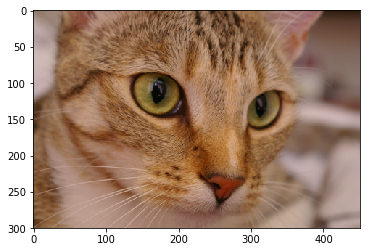

In [27]:
plt.imshow(image)
plt.show()

So we have an image of a cat with dimensions 300x400. The image being in natural colors, the three dimensions probably indicate an RGB (red, green, blue) format, and the plotting function just knows what to do in that case.

### 2.3.1 Array slicing

Let us now just look at one of the three planes composing the image. To do that, we are going the select a portion of the image array by slicing it. One can give:
- a single index e.g. 0 for the first element
- a range e.g. 0:10 for the first 10 elements
- take all elements using a semi-column :

What portion is selected has to be specified for each dimensions of an array. In our particular case, we want to select all rows, all columns and a single plane of the image:

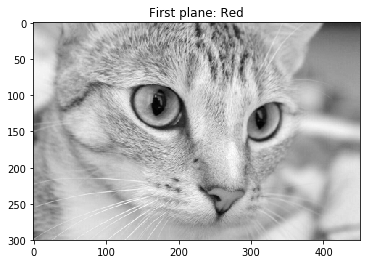

In [28]:
plt.imshow(image[:,:,0],cmap='gray')
plt.title('First plane: Red')
plt.show()

We see now the red layer of the image. We can do the same for the others by specifying planes 0, 1, and 2:

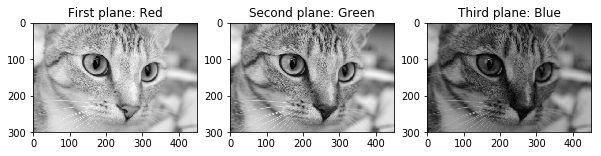

In [29]:
fig,ax = plt.subplots(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(image[:,:,0],cmap='gray')
plt.title('First plane: Red')
plt.subplot(1,3,2)
plt.imshow(image[:,:,1],cmap='gray')
plt.title('Second plane: Green')
plt.subplot(1,3,3)
plt.imshow(image[:,:,2],cmap='gray')
plt.title('Third plane: Blue')
plt.show()

Logically intensities are high for the red channel and low for the blue channel as the image has red/brown patterns. We can confirm that by measuring the mean of each plane. To do that we use the same function as above but apply it to a single sliced plane:

In [30]:
np.mean(image[:,:,0])

147.67308943089432

and for all planes using a comprehension list:

In [31]:
[np.mean(image[:,:,i]) for i in range(3)]

[147.67308943089432, 111.44447893569844, 86.79785661492978]

To look at some more details let us focus on a smaller portion of the image e.g. one of the cat's eyes. For that we are going to take a slice of the red image and store it in a new variable and display the selection. We consider pixel rows from 80 to 150 and columns from 130 to 210 of the first plane (0).

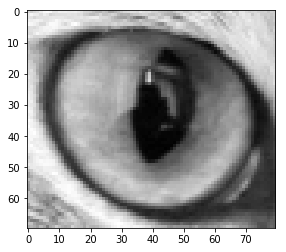

In [32]:
image_red = image[80:150,130:210,0]
plt.imshow(image_red,cmap='gray')
plt.show()

There are different ways to select parts of an array. For example one can select every n'th element by giving a step size. In the case of an image, this subsamples the data:

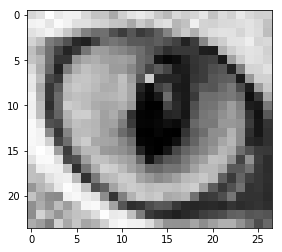

In [33]:
image_subsample = image[80:150:3,130:210:3,0]
plt.imshow(image_subsample,cmap='gray')
plt.show()

Or use negative indices or steps to start from the end of the array. In our case this flips dimensions:

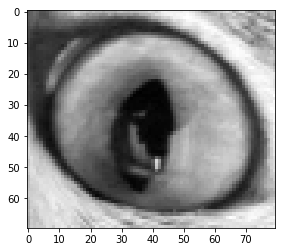

In [34]:
image_reverse = image[150:80:-1,210:130:-1,0]
plt.imshow(image_reverse,cmap='gray')
plt.show()

### 2.3.2 Array indexing

In addition to slicing an array, we can also select specific values out of it. There are [many](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html) different ways to achieve that, but we focus here on two main ones.

First one might have a list of pixel positions and one wishes to get the values of those pixels. By passing two lists of the same size containing the rows and columns positions of those pixels, one can recover them:

In [35]:
row_position = [0,1,2,3]
col_position = [0,1,0,1]

print(image_red[0:5,0:5])

image_red[row_position,col_position]

[[166 162 169 174 185]
 [183 192 185 183 173]
 [179 178 168 175 176]
 [187 184 187 189 185]
 [195 192 187 181 169]]


array([166, 192, 179, 184], dtype=uint8)

Alternatively, one can pass a logical array of the same dimensions as the original array, and only the True pixels are selected. For example, let us create a logical array by picking values above a threshold:

In [36]:
threshold_image = image_red>120

Let's visualize it. Matplotlib handles logical arrays simply as a binary image:

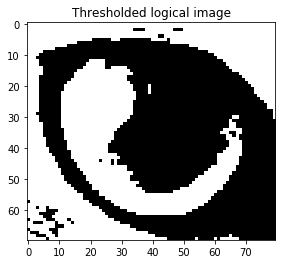

In [37]:
plt.imshow(threshold_image,cmap = 'gray')
plt.title('Thresholded logical image')
plt.show()

We can recover the value of all the "white" (True) pixels in the original image by using:

In [38]:
selected_pixels = image_red[threshold_image]
print(selected_pixels)

[166 162 169 ... 148 137 132]


And now ask how many pixels are above threshold and what their average value is.

In [39]:
len(selected_pixels)

2585

In [40]:
np.mean(selected_pixels)

153.59381044487426

We now know that there are 2585 pixels above the threshold and that their mean is 153.6

## 2.4 Creating arrays

Often we are going to create new arrays that we are going to then transform. There are a few common ways of doing that.

Creating a zero array of dimensions 3x5:

In [41]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Same for an array filled with ones:

In [42]:
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Create an array filled with random uniform (0-1) values:

In [43]:
np.random.rand((3,5))

TypeError: 'tuple' object cannot be interpreted as an integer

Clearly we did something wrong. The argument that was passed was not accepted by the functions. This is a good occasion to look at the help for a more complex function, in order to know how to pass arguments.

In [ ]:
help(np.random.rand)

So we understand now that we can just pass a list of numbers:

In [ ]:
np.random.rand(3,5)

## 2.5 Assembling arrays

It might happen that we have separate images that need to be assembled into one larger matrix. Numpy provides several functions to achieve that. For example we can concatenate images, which means that we append an image to another. Let's grab each channel of the cat image:

In [ ]:
image_red = image[:,:,0]
image_green = image[:,:,1]
image_blue = image[:,:,1]

And concateante them:

In [ ]:
concatenated_image = np.concatenate((image_red,image_green))

In [ ]:
plt.imshow(concatenated_image,cmap = 'gray')
plt.show()

We can specify along which axis they should be assembled:

In [ ]:
concatenated_image = np.concatenate((image_red,image_green),axis = 1)

In [ ]:
plt.imshow(concatenated_image,cmap = 'gray')
plt.show()

Alternatively, we might want to create a stack of image from separate images. Let's recreate the cat image by switching the red and blue channel. We assemble the separate color images and specific that they should be stacked along the third axis (axis =2).

In [ ]:
switch_image = np.stack((image_blue,image_green,image_red),axis = 2)

We verify that the dimensions are the expected ones:

In [ ]:
switch_image.shape

In [ ]:
plt.imshow(switch_image)
plt.show()